# Introduction

#### This notebook describes my own implementation of Linear Regression Models using Least Squares and Least Mean Squares Method.
#### It also includes few experiments on how to choose best learning rate in Stochastic Gradient Descent Method and how to find best parameters for your model.

author : @ShubhamGupta

A linear model can be defined as the approach of modeling the scaler response of a dependent variable with one or more independent or exploratary variables and can be represented as:

$$ 
\begin{align}
f(x;w)  &= w_0 x_0 + w_1 x_1 + ....... + w_D x_D \\
       &= \sum_{i=0}^{D} w_i x_i \quad\text{where} x_0 = 1 \\
       &= w^\top x
\end{align}
$$ 

If we have one independent variable, then our model is called **Univariate Linear Model**. If the number of independent variable is greater than one, then the model is known as **Multivariate Linear Model**

**_In this assignment_**, I have implemented two Linear models : **Least Squares** and **Least Mean Squares** using the mathematical derivations that we did in class. I used the dataset from my previous assignment, **Bike Sharing Dataset** in Capital bikeshare system between years 2011 and 2012. In this dataset, I have various features and based on these features we use both of these models to predict the count of rented bikes and compare/visualize with the results that are already in our dataset.

# Data

## Description

This is a dataset for hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Since this data was large enough and containing two individual datasets for daily and hourly count of rental bikes, I chose **hourly dataset** for my analysis. I got this data from **UCI Machine Learning repository**.

Below are the descriptive features of this dataset:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

##### Source of Data:

Fanaee-T, Hadi, and Gama, Joao, _'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg_, University of Porto,
2013, https://link.springer.com/article/10.1007%2Fs13748-013-0040-3

Dataset Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 

### Reading Data

In [2]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the dataset for regression
dataset = pd.read_csv('bike_hour.csv')

In [498]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [499]:
#Checking if there is any missing attribute in the entire dataset
np.any(dataset.isnull())

False

Good news! There is no missing data in this dataset, so we don't need to handle missing values for this dataset.

In [4]:
dataset.shape

(17379, 17)

In [3]:
# Separating the dependent variables and independent variable in two different datasets
# X conatins all the independent variables
# Y contains the only dependent variable i.e. count of the rented bikes.
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

### Visualization of Data

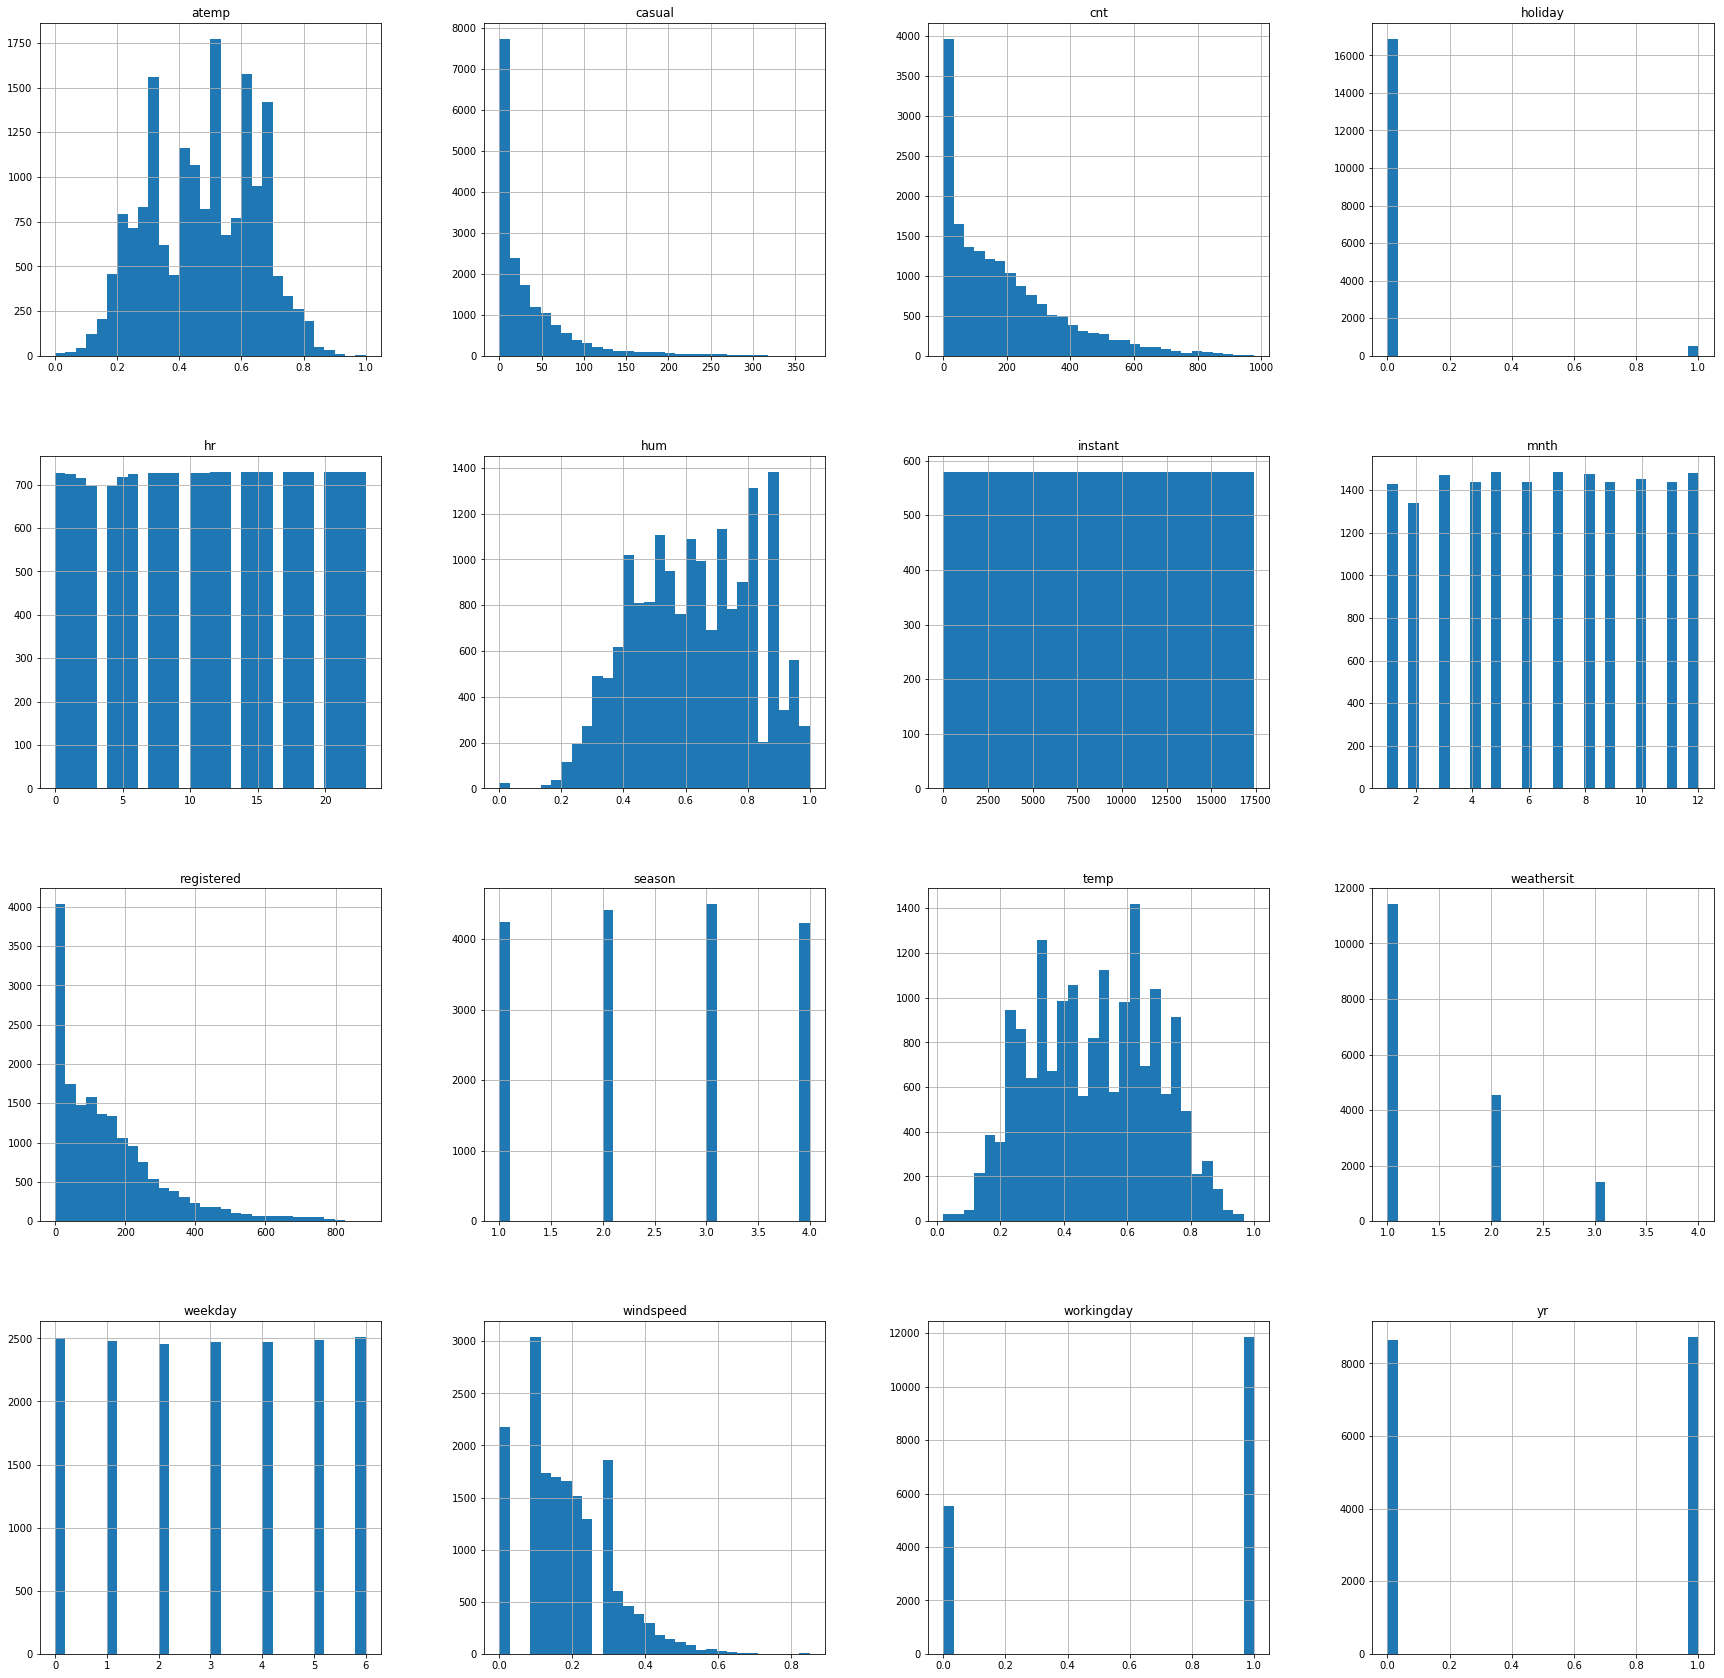

In [5]:
dataset.hist(bins=30, figsize=(30,30))
plt.show()

This plot gives the overall idea about the dependent variables of the dataset. All the values seem to be in nominal range, so this dataset does not require scaling.

###### Lets visualize this data furthermore. The weather conditions are very important in the bike renting data. We will visualize the count of rented bikes(hourly) wrt climatic parameters like temperature, windspeed and also will try to analyse the trend on different days of the week.

Text(0.5, 1.0, 'Temperature VS Count')

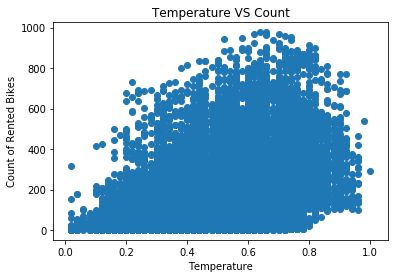

In [17]:
plt.scatter(X.iloc[:,10],Y)
plt.xlabel("Temperature")
plt.ylabel("Count of Rented Bikes")
plt.title("Temperature VS Count")

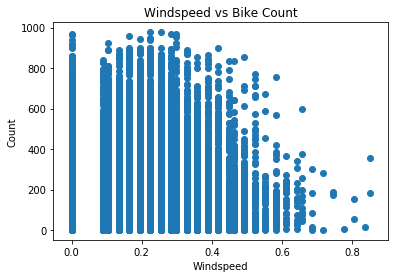

In [18]:
plt.scatter(X.iloc[:,13], Y)
plt.title('Windspeed vs Bike Count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

The higher the windspeed, lesser the count of rented bikes. If there is lesser windspeed, then the count of rented bikes goes higher.

<Figure size 2880x360 with 0 Axes>

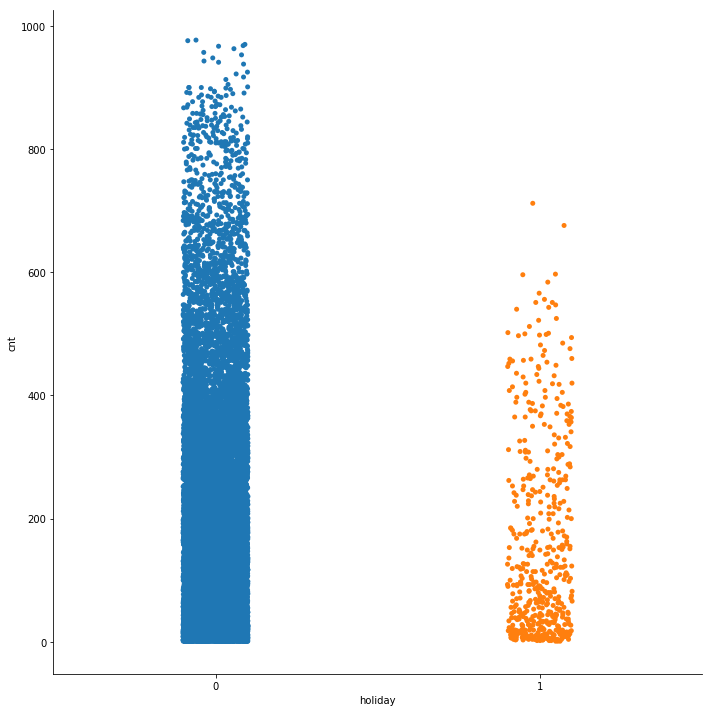

In [28]:
fig = plt.figure(figsize=(40,5))
sns.catplot(data=dataset, x="holiday", y="cnt", height = 10)

1 if it is a holiday, 0 if it is a non-holiday. This plot adds more weightage to the point discussed in last plot i.e. people o Holidays used lesser bike compared to non-holiday.

<Figure size 2880x360 with 0 Axes>

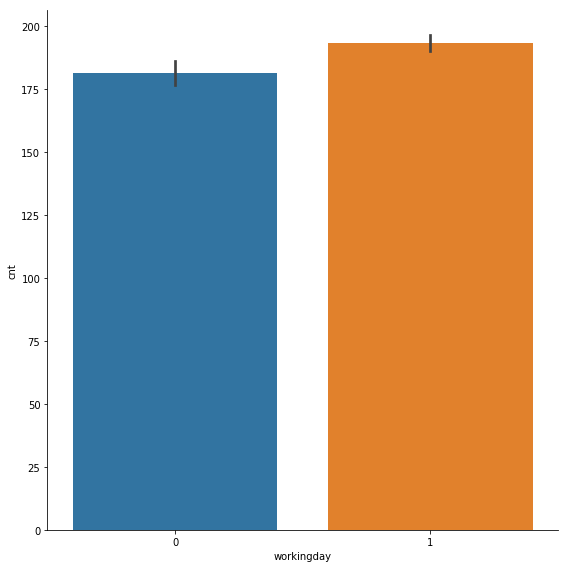

In [417]:
fig = plt.figure(figsize = (40,5))
sns.catplot(data=dataset, x = "workingday", y ="cnt",height=8,kind='bar')

1 if it is a working day, 0 if it is a holiday or weekend. We can visualize from above catplot that there are more rented bikes on working day than on a non working day, which can point to one conclusion that people in Portugal might be using bike for work.

<Figure size 2880x360 with 0 Axes>

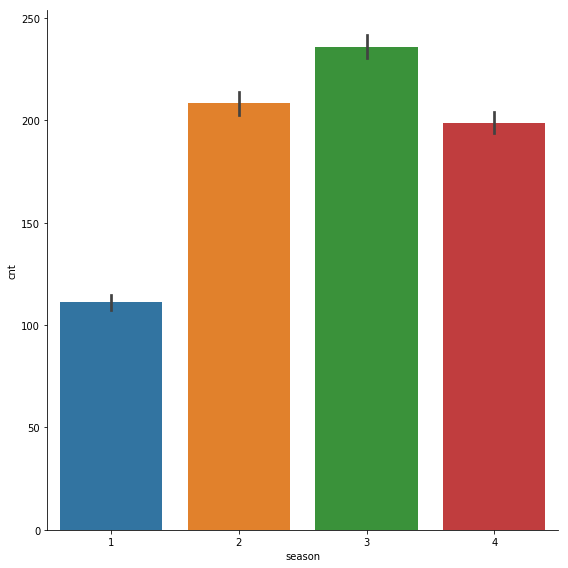

In [30]:
fig = plt.figure(figsize = (40,5))
sns.catplot(data=dataset, x = "season", y ="cnt",height=8,kind='bar')

seasons - > 1:springer, 2:summer, 3:fall, 4:winter
It is evident from the above catplot that people rented more biked in Fall compared to Summer or Spring.

## Preliminary Observation

We used various python libraries such as pandas, numpy, matplotlib, seaborn to import datasets, data preprocessing and visualisation. We also found that there are no missing values in this dataset or any categorical data that needed special handling. In this bike_hour.csv dataset, we had various dependent variables like temperature, humidity, windspeed, holiday, working day, seasons, etc and this regression problem was to predict the count of rented bikes. We plotted various graphs like histogram, catplots, scatter plots and observed some interesting information about the data summarised as following:

* People prefer to go to work using bikes and there are more rented bikes on weekday rathar than any holiday or weekend.
* Windspeed plays a key role in bike renting. If the windspeed was less i.e. between 0 - 0.2, teh count of rented bikes per hour was between range 800 and 1000. However, as we see the days where windspeed was higher i.e between 0.7-0.8, the count of rented bikes was signficantly down under 400.
* The last catplot provided another angle for the data observaion. The average bikes rented in Fall season were the highest, however Spring was the least productive season for bike renters, where average count of bike renting was close to just 100 per hour.

## Preprocessing of the data

Let me visualise the list of all independent variables through a corelation heatmap using seaborn.

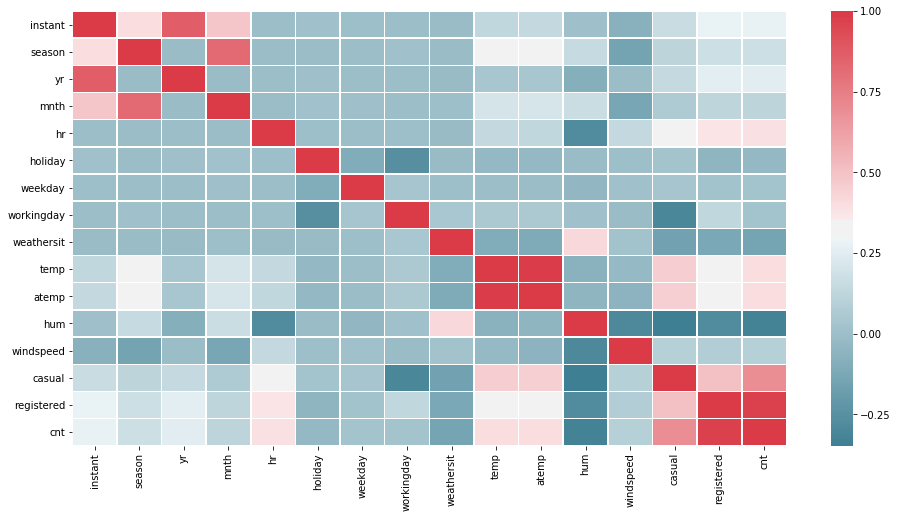

In [5]:
#Correlation heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = dataset.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap=cmap, linewidths = 0.5)


In [501]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Removing the unwanted column

Attribute "**dteday**" is string with date which is not relevant to this prediction model. There are 768 unique dates in the dataset. If we convert this categorical variable using One Hot Encoder or Label Encoder, then this will result in (768+17)=785 columns in the dataset. I will discuss this in the later part of the report ("Experiments") section. For now, I will be dropping this column off the dataset.

In [6]:
dataset = dataset.drop("dteday", axis = 1)
print("Shape : {}".format(dataset.shape))
dataset.head()

Shape : (17379, 16)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###### Categorical Values

There are few categorical columns in our dataset such as:

season : season (1:springer, 2:summer, 3:fall, 4:winter)

weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We will enhance these features by separating different seasons and weathers.

In [723]:
dataset.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [724]:
dataset = pd.concat([dataset.iloc[:,0:1],pd.get_dummies(dataset['season'], prefix='season'), dataset.iloc[:,2:8], 
               pd.get_dummies(dataset['weathersit'],prefix='weather'), dataset.iloc[:,9:]],axis=1)
dataset.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_2,weather_3,weather_4,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,0,0,1,0,0,6,...,0,0,0,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,0,0,0,1,1,0,6,...,0,0,0,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,0,0,0,1,2,0,6,...,0,0,0,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,0,0,0,1,3,0,6,...,0,0,0,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,0,0,0,1,4,0,6,...,0,0,0,0.24,0.2879,0.75,0.0,0,1,1


So, we have taken care of the categorical variables in our dataset by separating them to different columns.

##### Outliers

At first look, "cnt" variable contains lot of outlier data points which skews the distribution. Lets create boxplots to visualise the outliers in our dataset.

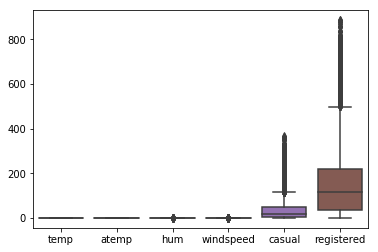

In [508]:
fig.set_size_inches(10,10)
sns.boxplot(data=dataset[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered']])
fig=plt.gcf()

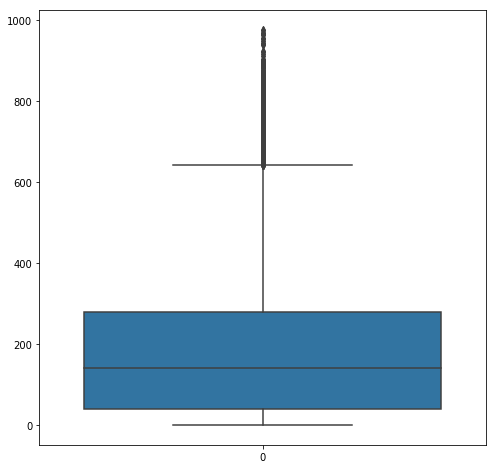

In [504]:
sns.boxplot(data=dataset['cnt'])
fig=plt.gcf()
fig.set_size_inches(8,8)

As per Chebychev's rule, 3 std. deviations account for 99% of data. Using this approach, we filter out the rest of the data.

**Lets Remove Outliers In The Count Column**

In [725]:
print("Dataset shape before : {}".format(dataset.shape))
dataset =  dataset[(np.abs(dataset['cnt']-dataset['cnt'].mean()))<=(3*dataset['cnt'].std())]
print("Dataset shape after removing outliers : {}".format(dataset.shape))

Dataset shape before : (17379, 22)
Dataset shape after removing outliers : (17135, 22)


In [726]:
#Resetting the dataset indices
dataset = dataset.reset_index(drop = True)

In [729]:
dataset.shape

(17135, 22)

##### Segregate Dependent and Independent Variables

Let's first divide the independent and dependent variables. In my dataset, "cnt" is the dependent variable that we will be predicting using this Linear Model, rest all the attributes are independent.

In [730]:
X = dataset.iloc[:,:-1]
T = dataset.iloc[:,-1:]
print("Shape of X : {} \nShape of T : {}".format(X.shape,T.shape))

Shape of X : (17135, 21) 
Shape of T : (17135, 1)


##### Feature Scaling

Feature scaling is a method used to standardize the range of independent variables in the dataset. Although, temp, atemp , hum are normalised in the inital dataset, I will be performing **Data Normalization** to fine tune the parameters further. Lets define a function to normalize the independent variables.

In [551]:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [731]:
#Normalise the Indepdendent Variables
X = normalize(X)
X.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_1,weather_2,weather_3,weather_4,temp,atemp,hum,windspeed,casual,registered
0,-1.719276,1.745241,-0.583735,-0.585802,-0.566843,-0.990966,-1.599755,-1.656997,-0.173365,1.488226,...,0.726522,-0.597218,-0.299666,-0.013233,-1.323133,-1.081158,0.938922,-1.550716,-0.652964,-0.976287
1,-1.719077,1.745241,-0.583735,-0.585802,-0.566843,-0.990966,-1.599755,-1.512733,-0.173365,1.488226,...,0.726522,-0.597218,-0.299666,-0.013233,-1.427146,-1.169679,0.887083,-1.550716,-0.550356,-0.836473
2,-1.718877,1.745241,-0.583735,-0.585802,-0.566843,-0.990966,-1.599755,-1.368469,-0.173365,1.488226,...,0.726522,-0.597218,-0.299666,-0.013233,-1.427146,-1.169679,0.887083,-1.550716,-0.611921,-0.873266
3,-1.718678,1.745241,-0.583735,-0.585802,-0.566843,-0.990966,-1.599755,-1.224204,-0.173365,1.488226,...,0.726522,-0.597218,-0.299666,-0.013233,-1.323133,-1.081158,0.627891,-1.550716,-0.652964,-0.998363
4,-1.718478,1.745241,-0.583735,-0.585802,-0.566843,-0.990966,-1.599755,-1.079940,-0.173365,1.488226,...,0.726522,-0.597218,-0.299666,-0.013233,-1.323133,-1.081158,0.627891,-1.550716,-0.714529,-1.064591


##### Partitioning Data

I have defined this function to partition the dataset. This will first shuffle the indices of the dataset randomly, then I compute the size of training and test dataset and create the datasets using these randomly shuffled indices.

In [555]:
def partition(X, T, train_ratio): 
    """
    Partion the dataset to test and train
    
    Parameters
    -----------
    
    X: 2-d array of independent variables
    T: 1-d or 2-d array of dependent variable
    train_ratio : ratio of desired training dataset
    
    Returns
    --------
    
    4 lists with splitted datasets
    
    """
    
    # create random train/test split
    N = X.shape[0]
    idxs =  np.random.permutation(X.index)
    nrows = int(train_ratio * N)
    
    train_idxs = idxs[:nrows]
    test_idxs = idxs[nrows:]

    # split the actual data
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    T_train, T_test = T.iloc[train_idxs], T.iloc[test_idxs]
    
    return X_train,X_test, T_train, T_test

The partition function that I defined will be returning dataframes not numpy arrays. I have done this because I will need these dataframes while visualizng my results in the later part of this exercise.

In [732]:
X_tr, X_ts, T_tr, T_ts = partition(X, T, train_ratio = 0.8 )

In [1013]:
#Converting dataframes to numpy arrays
X_train = X_tr.values
X_test = X_ts.values
T_train = T_tr.values
T_test = T_ts.values

In [734]:
print(X_train.shape,X_test.shape,T_train.shape,T_test.shape)

(13708, 21) (3427, 21) (13708, 1) (3427, 1)


# Method

## Review

We implemented Linear Model using two different Algorithms : **Least Squares** and **Least Mean Squares**.

##### Least Squares
The best fit in the least-squares sense minimizes the sum of squared residuals (a residual being: the difference between an observed value, and the predicted value provided by a model) i.e. our goal is to minimize the error or cost function. This method provides the best fit to the data using simple calculus and linear algebra. We have a set of independent variables, using them we find weight vector to fit linear model with our dataset. Once, we have the "best fitting line", we can predict values for unknown variable. The weight vector can be calculated using below equation:

$$ 
\begin{align}
w = (X^\top X )^{-1} X^\top t
\end{align}
$$

###### Least Mean Squares
Least Squares works well with small datasets. However, if the dataset is sufficiently large it is quite expensive(computationally) to apply Least Squares Algorithm to find the best fit for the model. We use online or sequential learning. In this type of learning, we introduce datapoints either in batches or one by one(again depending on our model) and iterate over the dataset.
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the  cost function. After derivation, we got the below equation for calculating the weight vector in online or sequential learning:

$$ 
\begin{align}
w^{(k+1)} = w^{(k)} - \alpha({w^{(k)}}^\top x_k - t_k)x_k
\end{align}
$$

Here, $ \alpha $ is learning rate.



## Explaination of codes

After derivating the equations to find the best weight vector, here is how I implemented both of these algorithms to fit my dataset. Initailly, we define a super class with BaseModel having train and use methods. Next we define a derived class LinearModel that inherits BaseModel Class. We have additonal methods like **__init__** to initialise weight vector w as none; **_checkMatrix** to check the shape of a matrix as (m X n ); **add_ones** to modify the input dataset to add a column of ones as our Linear Model is defined as:
$$
\begin{align}
f(x;w) = w_0 x_0 + w_1 x_1 + w_2 x_2 + ........ + w_D x_D
\end{align}
$$

Here $x_0 = 0 $. So, we define add_ones method to modify our dataset to add a column of ones at the beginning.
Next, lets review the implementation of Least Squares and Least Mean Squares Classes.

###### Least Squares:
We define **LinearRegress** class that inherits **LinearModel**. Firstly, we initialise the weight vector w as None in __init__ method. Now, we train our model for the dataset using train method. Initally, we modify the dataset X using the add_ones method from super class so that our dataset now conatins an additonal column of 1's as its first column. As the next step in train method, we fit our dataset to the Least Squares Model, calculating the best weight vector w (using the equation as described in previous section) for our model. 
We split our dataset to test and train. Now since we have trained our model, we will be applying this trained model to our test dataset to get the predictions. Here, we define a use function to predict the values for test data. We initially use add_ones method to modify the dataset and then perform dot product of X and weight vector w, that we computed in train method. This function will return a list of predicted values.

###### Least Mean Squares:
For implementing Least Mean Squares, we define another class **LMS** that inherits **LinearModel**. As this is an online learning algorithm, we perform step by step training of our model. Here we have two training methods : **train** and **train_step**.

We initialise the weight vector w as None in constructor. In train method, firstly we modify our dataset to add column of 1's like we did in Least Squares. We initialise weight as a list of zeros and then iterate over data samples one by one and update the weights using train_step function. Now, in train_step we have two scenarios: one weight is already initialised as zero(then my code goes to else block) and if it hasn't been initialised or it is called directly(like in preliminary test), it initialises weight with zeros. We have x and t as the input to this function, using these we compute updated w(using the equation described in previous section for Least Mean Squares) and this process goes on for all the data samples one by one as train method calls train_step to update weight w at every iteration.

The key point which I understood while implementing this algorithm was logic behind the shapes of vectors and matrices. We need to understand what we are trying to do and how our output should look like. I performed reshaping of x and w vector to a (1,D+1) matrix and t to (1,1), where D is the number of feature variables or independent variables in my dataset.
While computing y, I took dot product of x and w's transpose as I wanted y in shape (1,1). So if I just visualise the shapes, it would be like: (1,D+1) @ (D+1,1) = (1,1). The next step was to compute the updated w in shape(1,D+1), calculated as:
$$(1,3) = (1,3) - (1,1) * (1,3) => (1,3)$$

**Note : This model is designed for my dataset which has only one target vairable. If our target matrix was of size N, then we would adjust the shapes accordingly. t would become (1,N) and x and w (N,D+1)**

## Correct implementation (preliminary test)

This block consists of all classes and methods described in above. 

### Super Class Definition

In [20]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [288]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        self.w = None
        
    # train least-squares model
    def train(self, X, T):
        X1=super().add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y = X1 @ self.w
        return y

### Least Mean Squares

In [352]:
import collections # for checking iterable instance
import copy

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.w = None
    
    # batch training by using train_step function
    def train(self, X, T):
        X1 = super().add_ones(X)
        self.w = np.zeros((1,X1.shape[1]))
        max_iterations = 1
        for i in range(max_iterations):
            for k in range(X1.shape[0]):
                self.train_step(X1[k],T[k])
                
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        t = t.reshape((t.shape[0],1))
        if self.w is None:
            x = np.reshape(x,(1,x.shape[0]))
            x = super().add_ones(x)
            self.w = np.zeros((1,x.shape[1]))
        else:
            x = np.reshape(x,(1,x.shape[0]))
        y = x @ self.w.T
        self.w -= self.alpha * (y - t) *  x
    
    # apply the current model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y = X1 @ self.w.T
        return y

### Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, I ran the following prelimiary test to check the correctness of implementation.

In [1014]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


#### Great! All tests passed successfully.

# Experiments

Now, we will train our dataset and use this model to predict some values. For that, we had already split our dataset into test and train sets. We will use the train methods to train our model and then use method to get some predictions. Lets get started!

**Note - I have not excluded any feature yet. The X_train & X_test consists of all the features in the dataset. I will use this for next set of experiments.**

## Description, Codes



Let's first use **Least Squares**. I will be training the model using this algorithm to predict values for X_test.

Firstly, we create ls_regressor object to call the Least Squares (LinearRegress). We train our model using train method and feed X_train and T_train. This leads to calculation of weight vector w, which we can use to predict values for X_test. Next, we call use method to predict the values of X_test. Here is the implementation:

In [872]:
#create object for the class LinearRegress
ls_regressor = LinearRegress()

#Train with X_train and T_train
ls_regressor.train(X_train,T_train)

#Use this model to predict cnt for X_test
T_pred_ls = ls_regressor.use(X_test)
T_pred_ls

array([[ 64.20922774],
       [307.80687788],
       [ 33.35810976],
       ...,
       [257.76681352],
       [420.34812832],
       [208.41176421]])

These are the values predicted by our model. Let us us check out the actual values in test set.

In [736]:
T_test

array([[ 58],
       [311],
       [ 37],
       ...,
       [262],
       [424],
       [205]], dtype=int64)

The model seems to be making **very close** predictions. We will visualise this next section for better understanding.

Let's try Least Mean Squares now.

In LMS, we perform the similar steps as we did in Least Squares by creating another object lms_regressor for LMS class and set our learning rate. We then train our model using X_train and T_train and finally predict the values for X_test using use method. The results will be stored in T_pred_lms. We then compare these predictions with the actual results in T_test. In the next section, we will visualise these predictions against the actual values.

In [874]:
#creating object for LMS class
lms_regressor = LMS(0.0002)    #here 0.2 is alpha, the learning rate, randomly choosen as 0.2

#Train with X_train and T_train
lms_regressor.train(X_train,T_train)

#Use this model to predict cnt for X_test
T_pred_lms = lms_regressor.use(X_test)
T_pred_lms

array([[ 56.36206057],
       [310.67521144],
       [ 43.23745467],
       ...,
       [271.90025401],
       [439.31053349],
       [206.71287578]])

So, these are the predicted values of X_test using Least Mean Squares Model and seems to be very accurate.

## Visualisation of Results

In this section, we will visualise the results of Least Squares and Least Mean Squares Prediction Models. I have plotted T_pred_ls(lms) VS T_test which is basically the predicted value and actual value. The actual value is shown in yellow color in both the plots where as predicted values in red.

Least mean squares was very accurate. Hence, both the plots overlap in below figure.

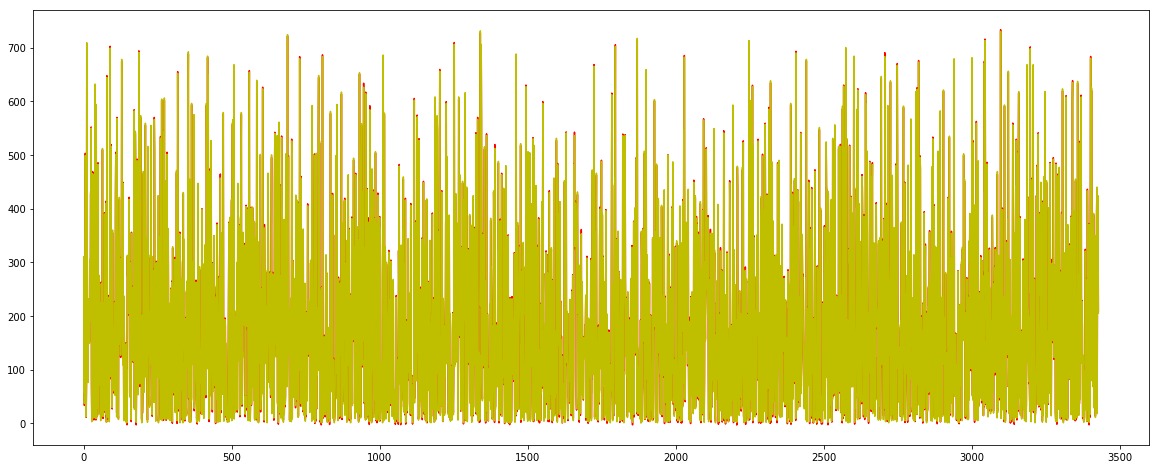

In [875]:
#Visualise Least Squares
plt.figure(figsize=(20,8))
plt.plot(T_pred_ls,'r')
plt.plot(T_test,'y')

Least Mean Squares was also pretty accurate in predicting the results, hence we see the overlap in the yellow and red lines i.e. actual and predicted values respectively.

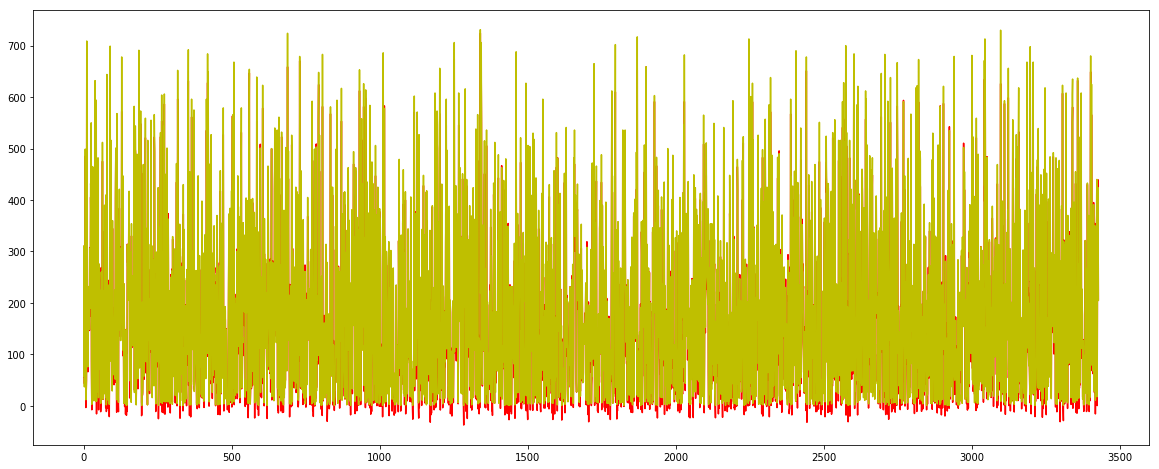

In [876]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(T_pred_lms,'r')
plt.plot(T_test,'y')

This are the  scatter plots for the most significant features of the datasets : Registered Users and Casual Users.
I have plotted the actual values with blue dots and the predicted values with yellow/red dots while the x-axis is independent variable. I have this for both the independent variables and for both the models in the below block.

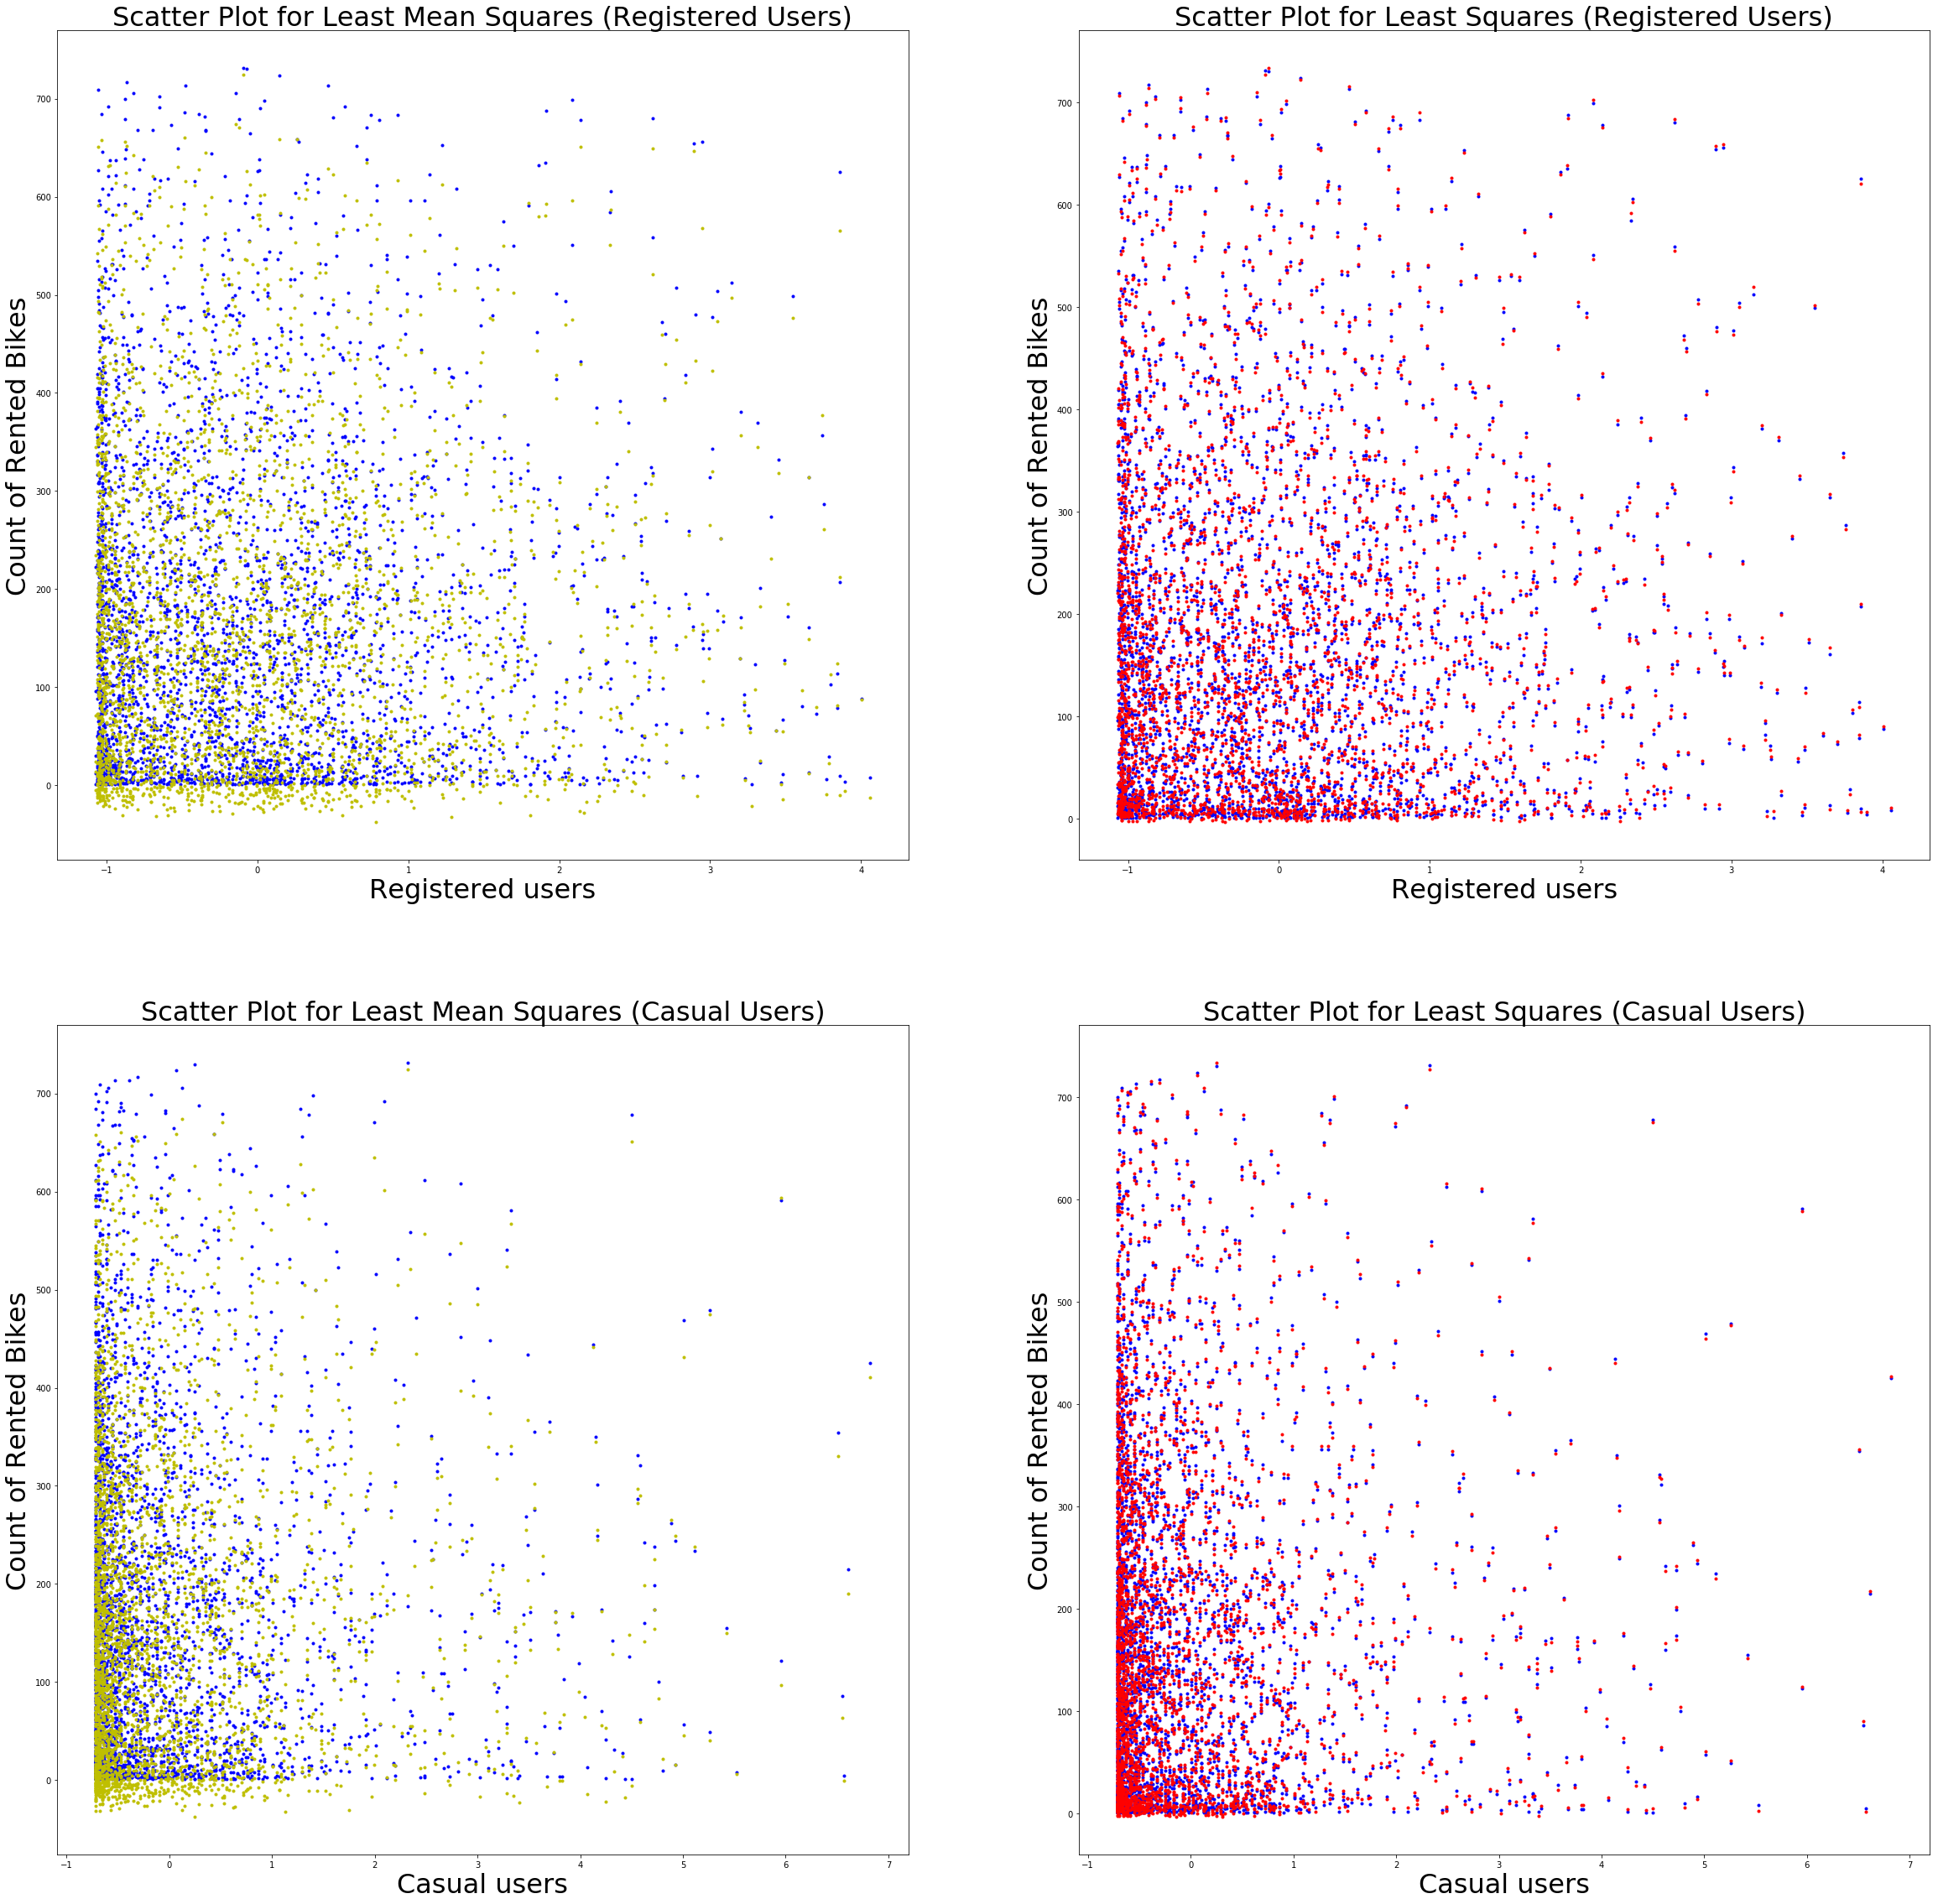

In [877]:
plt.figure(figsize=(40,40))

plt.subplot(2,2,1)
plt.plot(X_ts.iloc[:,-1:], T_test, 'b.')
plt.plot(X_ts.iloc[:,-1:], T_pred_lms, 'y.')
plt.xlabel("Registered users",fontsize=32)
plt.ylabel("Count of Rented Bikes",fontsize=32)
plt.title("Scatter Plot for Least Mean Squares (Registered Users)",fontsize=32)

plt.subplot(2,2,2)
plt.plot(X_ts.iloc[:,-1:], T_test, 'b.')
plt.plot(X_ts.iloc[:,-1:], T_pred_ls, 'r.')
plt.xlabel("Registered users",fontsize=32)
plt.ylabel("Count of Rented Bikes",fontsize=32)
plt.title("Scatter Plot for Least Squares (Registered Users)",fontsize=32)

plt.subplot(2,2,3)
plt.plot(X_ts.iloc[:,-2:-1], T_test, 'b.')
plt.plot(X_ts.iloc[:,-2:-1], T_pred_lms, 'y.')
plt.xlabel("Casual users",fontsize=32)
plt.ylabel("Count of Rented Bikes",fontsize=32)
plt.title("Scatter Plot for Least Mean Squares (Casual Users)",fontsize=32)

plt.subplot(2,2,4)
plt.plot(X_ts.iloc[:,-2:-1], T_test, 'b.')
plt.plot(X_ts.iloc[:,-2:-1], T_pred_ls, 'r.')
plt.xlabel("Casual users",fontsize=32)
plt.ylabel("Count of Rented Bikes",fontsize=32)
plt.title("Scatter Plot for Least Squares (Casual Users)",fontsize=32)

plt.show()

The above plot shows that in most of the cases predicted value overlaps the actual value, which shows the accuracy of both of our models.

## Analysis/Comparison of Algorithms

So, I have implemented the two algorithms and ran experiments with my entire dataset to test both of them.

First, let me calculate the Root Mean Square error for both of my models.

In [786]:
def rmse(T, Y):
    return np.sqrt(np.mean((T-Y)**2))

In [878]:
rmse_ls = rmse(T_test,T_pred_ls)
rms_lms = rmse(T_test,T_pred_lms)
print("LS RMSE  = {} \nLMS RMSE = {}".format(rmse_ls,rms_lms))

LS RMSE  = 3.554594972606307 
LMS RMSE = 21.95561812591003


Least Mean Squares(LMS) has higher RMSE as it is an online learning model or sequential learning model. In this method, we freedom of choice to random initialise our weight vector. I chose to initialise w with zeros(_just a random choice_). We then introduce our data samples iteratively and improve the weight vector in every iteration. Once all the all the data samples have been used to train our model, the weight vector which was updated at the last is used for predict the values for the test set. There could be possibility that the best weight vector could be have been lost if the dataset was not preprocessed well. However, when I was running experiments, I found in my dataset the standard deviation of some columns was outlying the other columns. Hence the model was not performing well and predicting infinity or naN values. To tune this, I perfomed **Standardization Normalizaion** over my entire independent variables dataset and my model was perfroming well then.

Least Squares(LS) is a batch learning model. In this model, we train our model using entire dataset at once. Hence, the RMSE is less in this case. In least squares model, we evaluate the weight vector using the mathematical equation which I decribed in earlier sections of this report. 

### LS Vs LMS ?
This is a difficult choice to make that which model is better than the other. We use online learning when the data is available in sequential model and we need to update our best predictor for future data at each step, as opposed to batch learning techniques which generate the best predictor by learning on the entire training data set at once. It is also used in situations where it is necessary for the algorithm to dynamically adapt to new patterns in the data. However, when convergence conditions are well understood, then Batch Learning i.e. Least Squares is more preferrable.

### Gradient Descent
Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost). Coefficients are randomly initialised and at each step we find out the derivative of cost function and use this to improve the coefficients at every step. This is what Least Mean Squares does and is called **Stochastic Gradient Descent**.

### Learning Rate
Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our model with respect the loss gradient. The lower the value, the slower we travel along the downward slope and the higher the value the model will change very quickly. The learning rate affects how quickly our model can converge. LMS algorithm multiply the gradient by learning rate.

###### I ran a below experiment to determine the best learning rate for my algorithm. I have randomly chosen learning rates and then plotted them against the rmse of every prediction.

[60.01226201585994, 21.95561812591003, 10.06725173623423, 2.9861527120276024, 4.655495866357906, 18.904784070440655, 37.080891076463445, 75.09691840702055, 111.3755929187911, 220.30487429714307, 803.7669098356198, 7249.97548065323]


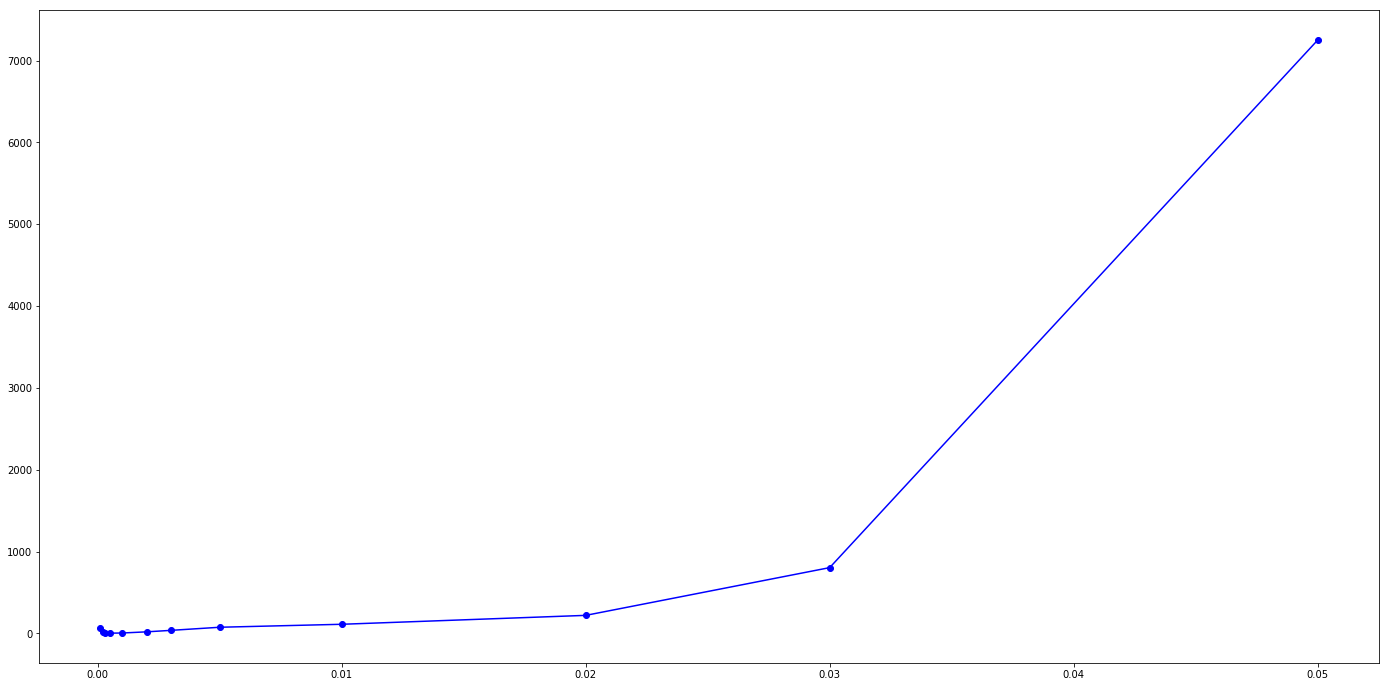

In [880]:
#here is the experiment with Learning rate

alpha = [0.0001,0.0002,0.0003,0.0005,0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.05]
rmse_alpha = []
for i in alpha:
    lms_aplha = LMS(i)
    lms_aplha.train(X_train,T_train)
    y_pred_alpha = lms_aplha.use(X_test)
    rmse_alpha.append(rmse(T_test, y_pred_alpha))
print(rmse_alpha)

plt.figure(figsize=(24,12))
plt.plot(alpha,rmse_alpha, 'b-o')

Learning rate has to be choosen very wisely. From my above experiment, I found that error function starts to converge at 0.03 and converges more if the learning rate is chosen even smaller. After various experiments with the learning rate, I chose $ \alpha $ to be **0.0002** for my Least Mean Squares Model.

So this is my analysis of both the models. In the next section, I will explore my dataset further and try to reduce the parameters and see how it impacts the prediction.

## Additional Analysis

So far I have included all the variables in my dataset to train the model and use it to predict the values for my test set. Now, let us analyse which features are most important and which ones are least important so that I can remove them and improve my model even further. To understand these features, I will be creating a correlation heatmap to understand how my independent variables are related to dependent variables.

In [912]:
#This is how my dataset looks like currently (without Normalisation)
dataset.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_2,weather_3,weather_4,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,0,0,1,0,0,6,...,0,0,0,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,0,0,0,1,1,0,6,...,0,0,0,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,0,0,0,1,2,0,6,...,0,0,0,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,0,0,0,1,3,0,6,...,0,0,0,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,0,0,0,1,4,0,6,...,0,0,0,0.24,0.2879,0.75,0.0,0,1,1


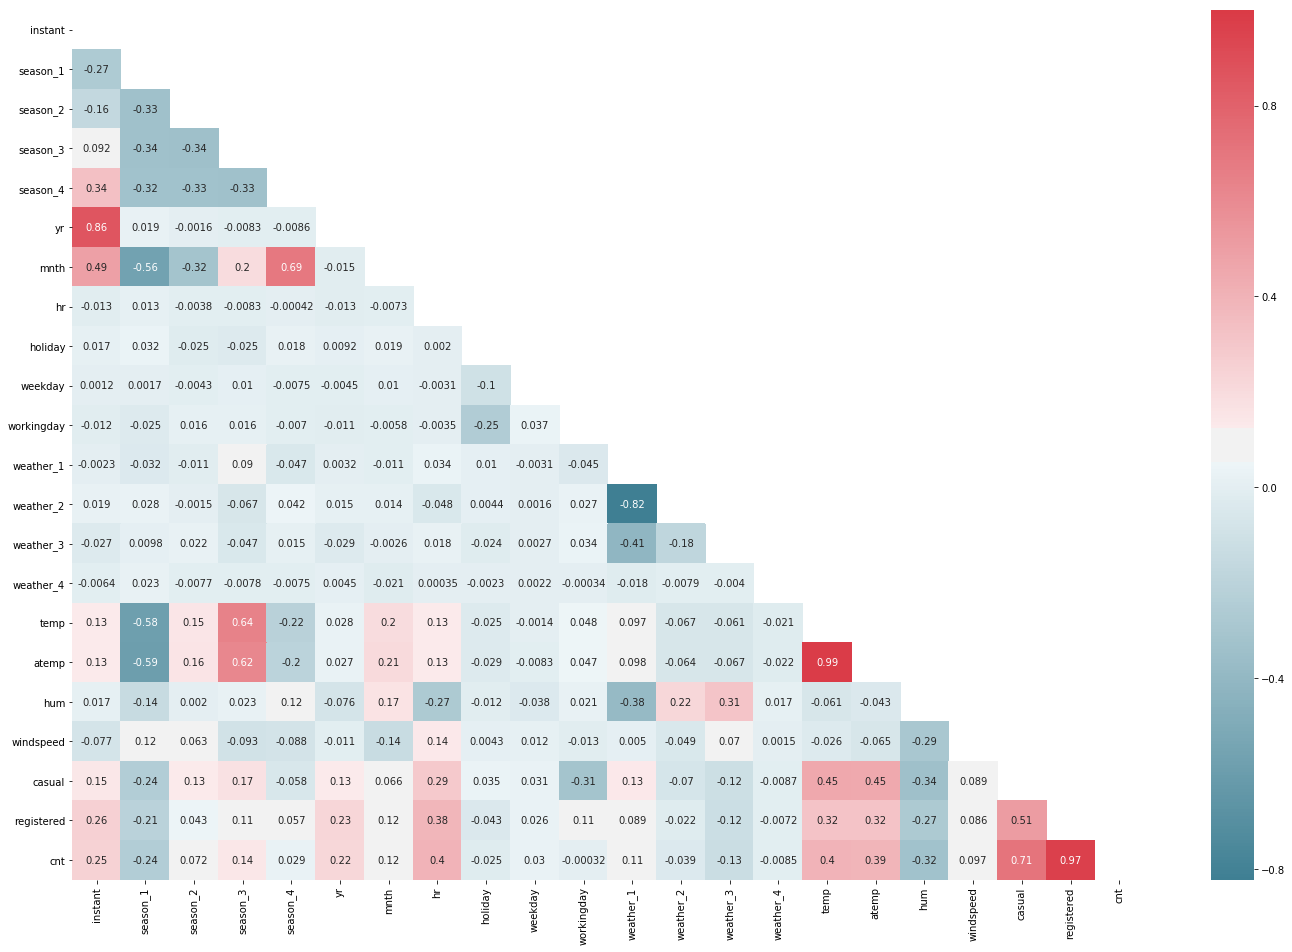

In [913]:
#Compute the correaltion matrix
corr = dataset.corr()

fif,ax = plt.subplots(figsize=(24,16))

#Generating mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#Generate the correaltion heatmap
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True)

**INFERENCES FROM THE ABOVE HEATMAP**

From this correlation matrix, we will be considering the relation of all independent variables with "cnt" i.e. our dependent variable(Count of Rented Bikes). Here are the parameters which are negatively correlated with cnt :
* weather
* hum (humidity)
* workingday

**Other Inferences**

* temp and atemp are highly related as expected.

* hum is inversely related to cnt as expected as when the weather is humid, people will not like to travel on a bike.

* count and holiday are highly inversely related as you would expect.

* registered/casual and cnt are highly related which indicates that most of the bikes that are rented are registered.

temp and atemp(absolute temp) are highly correlated. So, I can keep any one of them otherwise they will exhibit multicollinearity in the data. Also, casual and registered are highly correlated, so we can drop one of them.

**_Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results. This explains why I was getting the accurate results in my previous experiments. For fixing this, I will drop few columns and test my model again._**


Let's start dropping the least signigicant column and see if our models gets impacted or not.
"hum" has the highest negative corelation of 0.32. Lets drop this feature and run our regression model.

In [939]:
dataset.corr()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_2,weather_3,weather_4,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,-0.265426,-0.161342,0.092017,0.337073,0.864596,0.487584,-0.013327,0.017395,0.001245,...,0.019353,-0.026726,-0.006412,0.125191,0.126919,0.017309,-0.076779,0.145019,0.255828,0.251848
season_1,-0.265426,1.000000,-0.334473,-0.335657,-0.324793,0.018578,-0.564748,0.012618,0.032493,0.001676,...,0.028142,0.009849,0.023095,-0.583650,-0.587168,-0.140678,0.118126,-0.243317,-0.209833,-0.243056
season_2,-0.161342,-0.334473,1.000000,-0.341973,-0.330905,-0.001556,-0.316460,-0.003807,-0.024751,-0.004296,...,-0.001517,0.022486,-0.007725,0.147688,0.155035,0.002041,0.062998,0.126581,0.042588,0.071978
season_3,0.092017,-0.335657,-0.341973,1.000000,-0.332077,-0.008350,0.197023,-0.008263,-0.025242,0.009996,...,-0.067185,-0.047088,-0.007752,0.643195,0.620361,0.022963,-0.092957,0.171566,0.109391,0.139830
season_4,0.337073,-0.324793,-0.330905,-0.332077,1.000000,-0.008612,0.688709,-0.000422,0.018110,-0.007487,...,0.041546,0.015148,-0.007501,-0.216929,-0.197635,0.116032,-0.088205,-0.058232,0.056552,0.029184
yr,0.864596,0.018578,-0.001556,-0.008350,-0.008612,1.000000,-0.015116,-0.012779,0.009197,-0.004476,...,0.014551,-0.029125,0.004531,0.028069,0.026717,-0.076135,-0.010538,0.128761,0.226324,0.222940
mnth,0.487584,-0.564748,-0.316460,0.197023,0.688709,-0.015116,1.000000,-0.007283,0.019273,0.010137,...,0.013680,-0.002609,-0.021170,0.201214,0.207558,0.166179,-0.136065,0.065973,0.117109,0.115167
hr,-0.013327,0.012618,-0.003807,-0.008263,-0.000422,-0.012779,-0.007283,1.000000,0.002005,-0.003051,...,-0.047829,0.018463,0.000345,0.129256,0.125730,-0.271479,0.135875,0.294621,0.384086,0.400671
holiday,0.017395,0.032493,-0.024751,-0.025242,0.018110,0.009197,0.019273,0.002005,1.000000,-0.102460,...,0.004367,-0.024213,-0.002294,-0.025262,-0.028974,-0.012147,0.004302,0.035223,-0.042765,-0.024655
weekday,0.001245,0.001676,-0.004296,0.009996,-0.007487,-0.004476,0.010137,-0.003051,-0.102460,1.000000,...,0.001640,0.002703,0.002166,-0.001381,-0.008309,-0.037803,0.011930,0.030534,0.025990,0.030221


In [940]:
#Dropping some unnecessary column
data_ex = dataset.drop(['hum'], axis = 1)

This is how our dataset looks now after getting rid of unwanted column.

In [942]:
print(data_ex.shape)
data_ex.head()

(17135, 21)


,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_1,weather_2,weather_3,weather_4,temp,atemp,windspeed,casual,registered,cnt
0,1,1,0,0,0,0,1,0,0,6,...,1,0,0,0,0.24,0.2879,0.0,3,13,16
1,2,1,0,0,0,0,1,1,0,6,...,1,0,0,0,0.22,0.2727,0.0,8,32,40
2,3,1,0,0,0,0,1,2,0,6,...,1,0,0,0,0.22,0.2727,0.0,5,27,32
3,4,1,0,0,0,0,1,3,0,6,...,1,0,0,0,0.24,0.2879,0.0,3,10,13
4,5,1,0,0,0,0,1,4,0,6,...,1,0,0,0,0.24,0.2879,0.0,0,1,1


In [943]:
#Segregate independent and dependent variables

X_E = data_ex.iloc[:,:-1]
T_E = data_ex.iloc[:,-1:]

We had already taken care of categorical variables and removed the outliers wrt to ur dependent variable. Lets normalise this dataset before training the models.

In [947]:
X_E = normalize(X_E)
X_E.shape

(17135, 20)

Lets split the dataset into test and train.

In [948]:
#Partition the dataset
a,b,c,d = partition(X_E, T_E, train_ratio = 0.8 )

X_E_train = a.values
X_E_test = b.values
T_E_train = c.values
T_E_test = d.values

In [949]:
print(X_E_train.shape,X_E_test.shape,T_E_train.shape,T_E_test.shape)

(13708, 20) (3427, 20) (13708, 1) (3427, 1)


In [950]:
#Fitting with Least Squares

least_sq = LinearRegress()
least_sq.train(X_E_train,T_E_train)
y_pred = least_sq.use(X_E_test)
y_pred

array([[181.96530585],
       [ 23.4636791 ],
       [ 63.63732813],
       ...,
       [358.67018987],
       [ 31.30232824],
       [313.61960151]])

In [955]:
T_E_test

array([[182],
       [ 24],
       [ 65],
       ...,
       [359],
       [ 30],
       [314]], dtype=int64)

In [956]:
rmse(T_E_test,y_pred)

1.0848353511539597

This is the RMS error for our least squares model. This is further improved now. Now, lets visualise the actual and predicted values in an overlapping graph.

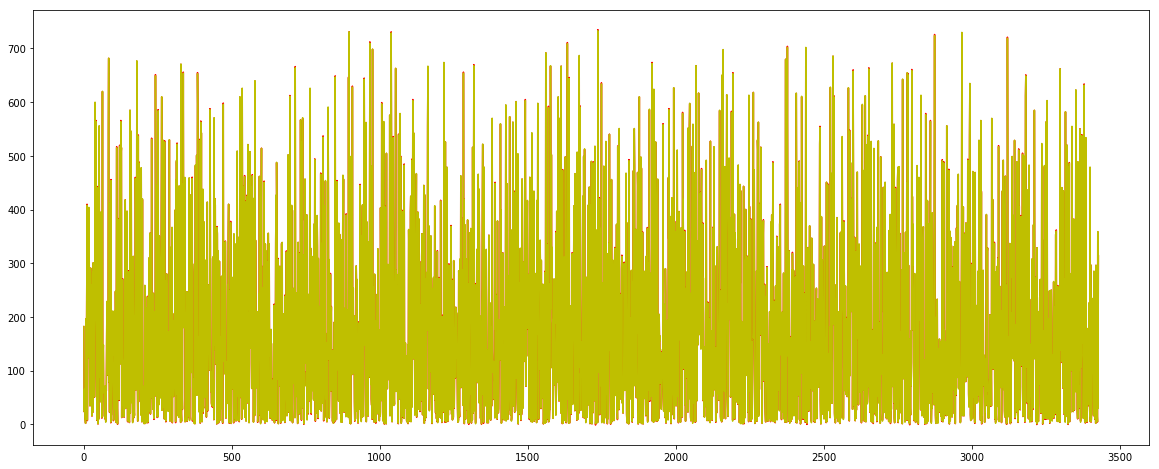

In [958]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(y_pred,'r')
plt.plot(T_E_test,'y')

###### Almost overlapping!!

Lets see how it goes with LMS model.

In [969]:
#Fitting with Least Mean Squares
lms = LMS(0.004) # learning rate of 0.004
lms.train(X_E_train,T_E_train)
y_pred_ = lms.use(X_E_test)
y_pred_

array([[182.12303684],
       [ 26.34434045],
       [ 70.4491447 ],
       ...,
       [369.99082596],
       [ 62.86178808],
       [325.98826813]])

In [970]:
rmse(T_E_test,y_pred_)

23.77954882790261

This is the RMS error for our least mean squares model. It has improved a lot now after getting rid of the least correlated attribute. Now, lets visualise the actual and predicted values in an overlapping graph.

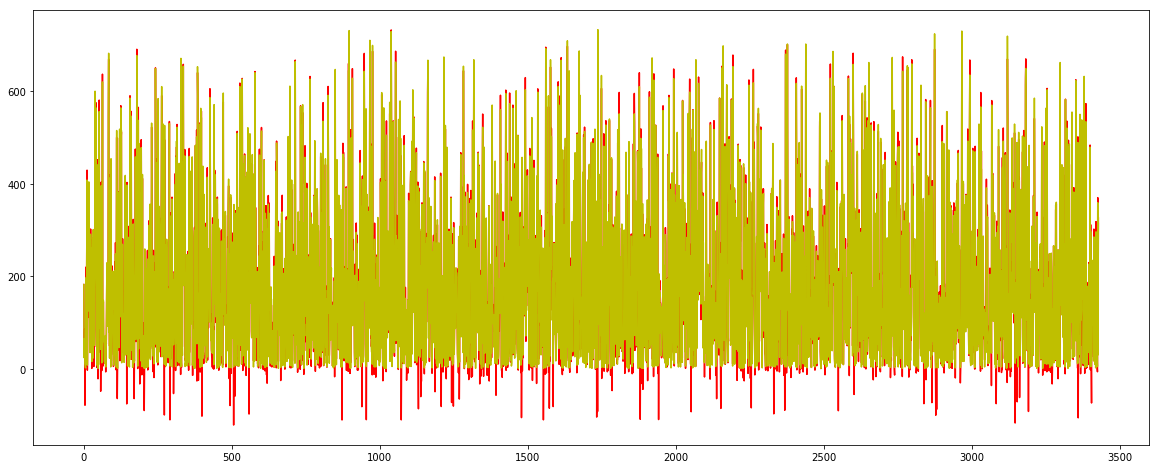

In [971]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(y_pred_,'r')
plt.plot(T_E_test,'y')

#### What if I remove one or two of the highly correlated features?

In [972]:
data_ex.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,...,weather_1,weather_2,weather_3,weather_4,temp,atemp,windspeed,casual,registered,cnt
0,1,1,0,0,0,0,1,0,0,6,...,1,0,0,0,0.24,0.2879,0.0,3,13,16
1,2,1,0,0,0,0,1,1,0,6,...,1,0,0,0,0.22,0.2727,0.0,8,32,40
2,3,1,0,0,0,0,1,2,0,6,...,1,0,0,0,0.22,0.2727,0.0,5,27,32
3,4,1,0,0,0,0,1,3,0,6,...,1,0,0,0,0.24,0.2879,0.0,3,10,13
4,5,1,0,0,0,0,1,4,0,6,...,1,0,0,0,0.24,0.2879,0.0,0,1,1


The two of the most important and highly correalted parameters to cnt are temp and registered. Now I will remove both of them and demostrate how model performs.

In [973]:
df = data_ex.drop(['temp','registered'],axis = 1)

In [974]:
df.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,holiday,weekday,workingday,weather_1,weather_2,weather_3,weather_4,atemp,windspeed,casual,cnt
0,1,1,0,0,0,0,1,0,0,6,0,1,0,0,0,0.2879,0.0,3,16
1,2,1,0,0,0,0,1,1,0,6,0,1,0,0,0,0.2727,0.0,8,40
2,3,1,0,0,0,0,1,2,0,6,0,1,0,0,0,0.2727,0.0,5,32
3,4,1,0,0,0,0,1,3,0,6,0,1,0,0,0,0.2879,0.0,3,13
4,5,1,0,0,0,0,1,4,0,6,0,1,0,0,0,0.2879,0.0,0,1


In [977]:
#Segregate independent and dependent variables

X_E = df.iloc[:,:-1]
T_E = df.iloc[:,-1:]

In [978]:
#Lets normalise this dataset before training the models.

X_E = normalize(X_E)
X_E.shape

(17135, 18)

In [979]:
#Partition the dataset

a,b,c,d = partition(X_E, T_E, train_ratio = 0.8 )

X_E_train = a.values
X_E_test = b.values
T_E_train = c.values
T_E_test = d.values

In [980]:
print(X_E_train.shape,X_E_test.shape,T_E_train.shape,T_E_test.shape)

(13708, 18) (3427, 18) (13708, 1) (3427, 1)


In [981]:
#Fitting with Least Squares

least_sq = LinearRegress()
least_sq.train(X_E_train,T_E_train)
y_pred = least_sq.use(X_E_test)
y_pred

array([[ 26.79664835],
       [ 38.21641622],
       [330.15423517],
       ...,
       [ 63.85130177],
       [ 52.58292218],
       [113.79934504]])

In [982]:
T_E_test

array([[ 20],
       [ 14],
       [210],
       ...,
       [123],
       [  4],
       [210]], dtype=int64)

In [983]:
rmse(T_E_test,y_pred)

102.14371643043073

This is the RMS error for our least squares model. Removing two of the most important and highly correlated features of the dataset has increased the rms error of our model.

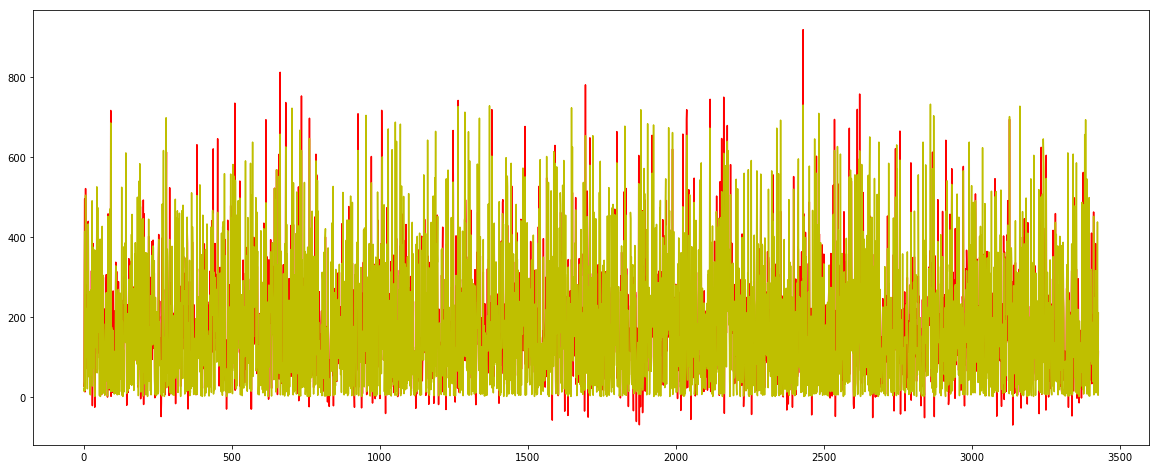

In [984]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(y_pred,'r')
plt.plot(T_E_test,'y')

In [985]:
#Fitting with Least Mean Squares
lms = LMS(0.004) # learning rate of 0.004
lms.train(X_E_train,T_E_train)
y_pred_ = lms.use(X_E_test)
y_pred_

array([[ 39.6812367 ],
       [ 31.6594947 ],
       [351.9442739 ],
       ...,
       [ 77.56373912],
       [ 61.90107635],
       [106.63771398]])

In [986]:
rmse(T_E_test,y_pred_)

104.09450451954164

In previous experiment of removal of least significant variable, RMS Error for LMS Model had improved to 23.77. When we removed the two important features from our dataset, the RMS error has increased to 104.09, which is not a good sign. Therefore, removing the highly correlated variables to dependent variables is not recommended.

#### Lets run one last experiment with mixed choice of variables.

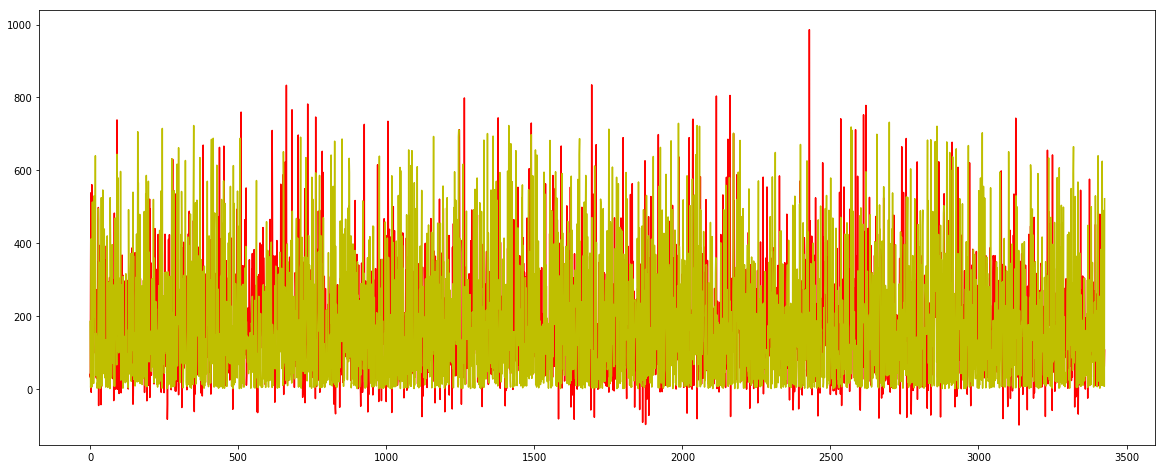

In [1002]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(y_pred_,'r')
plt.plot(T_E_test,'y')

As per the inferences taken from correlation heatmap, I am going to remove below features from my dataset and test its performance.

**Features to be removed : "hum", "weather_1", "weather_2", "weather_3", "weather_4", "windspeed", "weekday", "holiday" , "casual", "atemp"**

In [992]:
#Dropping some unnecessary columns
ds = dataset.drop(["hum", "weather_1", "weather_2", "weather_3", 
                   "weather_4", "windspeed", "weekday", "holiday" , "casual", "atemp"], axis = 1)

In [993]:
ds.shape

(17135, 12)

This is how dataset ds looks like now:

In [994]:
ds.head()

,instant,season_1,season_2,season_3,season_4,yr,mnth,hr,workingday,temp,registered,cnt
0,1,1,0,0,0,0,1,0,0,0.24,13,16
1,2,1,0,0,0,0,1,1,0,0.22,32,40
2,3,1,0,0,0,0,1,2,0,0.22,27,32
3,4,1,0,0,0,0,1,3,0,0.24,10,13
4,5,1,0,0,0,0,1,4,0,0.24,1,1


In [997]:
#Segregate independent and dependent variables

X_E = ds.iloc[:,:-1]
T_E = ds.iloc[:,-1:]

In [1000]:
#Lets normalise this dataset before training the models.

X_E = normalize(X_E)
X_E.shape

(17135, 11)

In [1003]:
#Partition the dataset
a,b,c,d = partition(X_E, T_E, train_ratio = 0.8 )

X_E_train = a.values
X_E_test = b.values
T_E_train = c.values
T_E_test = d.values

In [1005]:
print(X_E_train.shape,X_E_test.shape,T_E_train.shape,T_E_test.shape)

(13708, 11) (3427, 11) (13708, 1) (3427, 1)


In [1006]:
#Fitting with Least Squares

least_sq = LinearRegress()
least_sq.train(X_E_train,T_E_train)
y_pred = least_sq.use(X_E_test)
y_pred

array([[159.20406706],
       [242.09863266],
       [117.40759777],
       ...,
       [159.91265022],
       [ 10.98354056],
       [-12.93739819]])

In [1007]:
T_E_test

array([[150],
       [221],
       [ 92],
       ...,
       [160],
       [  3],
       [  3]], dtype=int64)

In [1008]:
rmse(T_E_test,y_pred)

32.12447126609913

The RMS error after feature selection is on avergae side now. Earlier, when we had just removed the least significant feature, our model performed well and RMS was less than 2.0. Now, when we removed the mix batch of variables, based on their correlation with dependent variable, we could see that the RMS error has increased but still not exponential as we saw in previous experiment when I removed two most significant variables.

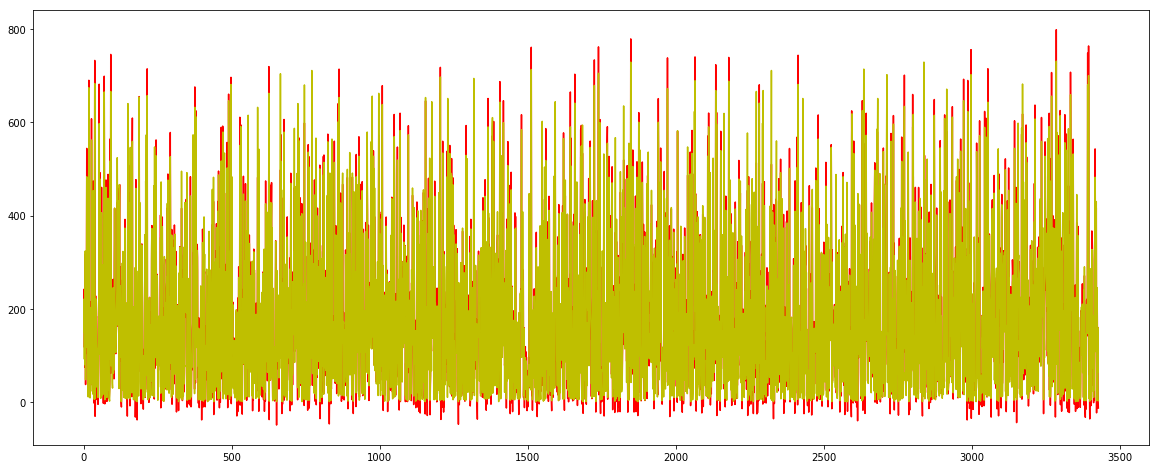

In [1009]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(y_pred,'r')
plt.plot(T_E_test,'y')

In [1010]:
#Fitting with Least Mean Squares
lms = LMS(0.004) # learning rate of 0.004
lms.train(X_E_train,T_E_train)
y_pred_ = lms.use(X_E_test)
y_pred_

array([[153.7510565 ],
       [248.05247705],
       [120.17088359],
       ...,
       [166.55379914],
       [ 11.09037763],
       [ -6.12704618]])

In [1011]:
rmse(T_E_test,y_pred_)

32.49480918366129

RMS Error for LMS model is almost similar to RMS error of Least Squares model. This shows both the models are stable now. Any unknown future values can be predicted with high precision by these Linear Models.

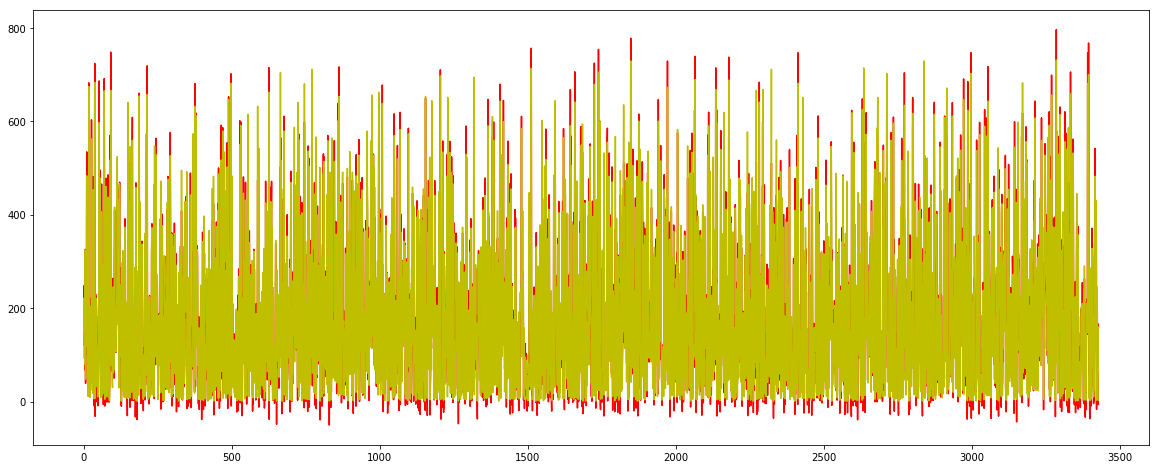

In [1012]:
#Visualise Least Mean Squares
plt.figure(figsize=(20,8))
plt.plot(y_pred_,'r')
plt.plot(T_E_test,'y')

**_This completes my analysis for feature selection for a Linear Model. I started with discarding the least significant feature and saw that both the models got improved and RMS error between the actual and predicted values was considerably less. However,when I removed two highly correlated features at the same time, the models had become worse and RMS error was greater than 100. In my last experiment, based on my correlation matrix which I computed and discussed above, I tried to handle multicollinearity and at the same time remove less significant features. This time, I found that both the models are stable with RMS error around ~32. This was not the case earlier. With changing features, Least Squares was performing well while Least Mean Squares was not that stable. Least squares is a batch learning process while LMS is an online or sequential learning. We need to attain stability in ur model so that if any new future unknown values are fed into the system, our model should be making sound predictions. This was relatively smaller dataset than what we see in real production environments, so by visualizing one would prefer Least Squares. However, LMS is the best choice as it has always got room for improvement based on its sequential learning._**

# Conclusions

This was a very interesting exercise and while I am writing this Conclusion section, I can affirmitvely say that I learned a lot about Linear Models through this exercise. Though we discussed the Linear Algebra and Calculus behind these models in the class, it was very challenging to implement these models and attain the accuracy that I was able to achieve. I started this assignment with implementing the Linear Models one by one. Firstly, I started with Least Squares method which was quite straight forward and I was able to complete comfortably as we were feeding the entire dataset at once and training the model in one-go. That is why is called Batch Learning or even called as Batch Gradient Descent Learning. The real challenge that I faced was with Least Mean Squares Model. After lot of debugging, I understood how the shape of vector /matrix is important while we are traiing our model. I ran into several issues and I was able to debug them and fix them. Then I ran the preliminary tests and was able to pass them with accurate results.

The next major challenge in this assignment was to fit my dataset with these models and make some predictions using to models to test the accuracy. My dataset was already normalised to some extent, but I was not getting sound results for LMS model. SO i had to use Standardization Normalization technique. As part of data preprocessing, firstly I removed the irrelevant object feature of date from my dataset. Next, I found categorical features such as "season", "weather" in my dataset. I used pandas get_dummies function to convert them to column features instead of using Label Encoder and One Hot Encoder. Next, I defined a function to partition my dataset to test and train with ratio 0.2 to 0.8 respectively(all the experiments I ran on this dataset). Finally, I trained the models one by one and used them to predict the test set values. These results have been discssed in detail in previous sections. I also learnt different type of visualisations in this assignment. I tried various visualisations than what I have presented the relevant ones in this report. **Tuning the learning rate** was another great learning of this exercise. I had to run some experiments with my dataset to find the optimal learning for my dataset.
The extra-credits section was also very interesting. I played even more with my dataset understanding the correlation between the variables and visualizing the model that how is affected if we removed a highly correlated variable or some other variables. I would like to conclude by saying that "Overall it was a good learning exercise and I look forward to upcoming machine learning assignments."

# References

Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg,
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science \& Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007),
https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006),
http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010),
http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

Jens Petersonhttp(stackoverflow username). “Answer to Question 'Train test split without using scikit learn' ”, Nov 2017
https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn

Jim Frost, "Statistics by Jim - Multicollinearity in Regression Analysis: Problems, Detection, and Solutions"
http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
    
Aurélien Géron, "_Hands on Machine learning with scikit learn and Tensorflow_", O'Reilly Media, 2017